In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 1.7895 - accuracy: 0.2083 - val_loss: 1.8268 - val_accuracy: 0.1250

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
1/1 [==============================] - 0s 84ms/step - loss: 1.7923 - accuracy: 0.2639 - val_loss: 1.8158 - val_accuracy: 0.1667

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
1/1 [==============================] - 0s 87ms/step - loss: 1.8259 - accuracy: 0.2222 - val_loss: 1.8056 - val_accuracy: 0.1667

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
1/1 [==============================] - 0s 87ms/step - loss: 1.8285 - accuracy: 0.3056 - val_loss: 1.7955 - val_accuracy: 0.2500

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
1/1 [==============================] - 0s 79ms/step - loss: 1.7542 - accuracy: 0.3056 - val_loss: 1.7

1/1 [==============================] - 0s 84ms/step - loss: 1.6607 - accuracy: 0.2917 - val_loss: 1.6317 - val_accuracy: 0.2917

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.6693 - accuracy: 0.3194 - val_loss: 1.6275 - val_accuracy: 0.2917

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.6343 - accuracy: 0.3333 - val_loss: 1.6235 - val_accuracy: 0.2917

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.6531 - accuracy: 0.2778 - val_loss: 1.6195 - val_accuracy: 0.3333

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.6184 - accuracy: 0.3472 - val_loss: 1.6155 - v

1/1 [==============================] - 0s 41ms/step - loss: 1.5381 - accuracy: 0.3194 - val_loss: 1.4752 - val_accuracy: 0.5000

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.5619 - accuracy: 0.3750 - val_loss: 1.4706 - val_accuracy: 0.5000

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5427 - accuracy: 0.3194 - val_loss: 1.4661 - val_accuracy: 0.5000

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5592 - accuracy: 0.3333 - val_loss: 1.4617 - val_accuracy: 0.5000

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.5387 - accuracy: 0.3611 - val_loss: 1.4574 - v

1/1 [==============================] - 0s 137ms/step - loss: 1.3568 - accuracy: 0.5000 - val_loss: 1.3076 - val_accuracy: 0.5833

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
1/1 [==============================] - 0s 125ms/step - loss: 1.4895 - accuracy: 0.3750 - val_loss: 1.3035 - val_accuracy: 0.6250

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
1/1 [==============================] - 0s 95ms/step - loss: 1.4998 - accuracy: 0.3611 - val_loss: 1.2994 - val_accuracy: 0.6250

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
1/1 [==============================] - 0s 122ms/step - loss: 1.4296 - accuracy: 0.4444 - val_loss: 1.2953 - val_accuracy: 0.6250

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
1/1 [==============================] - 0s 65ms/step - loss: 1.3529 - accuracy: 0.4167 - val_loss: 1.2


Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
1/1 [==============================] - 0s 73ms/step - loss: 1.2653 - accuracy: 0.4167 - val_loss: 1.1727 - val_accuracy: 0.6250

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.3576 - accuracy: 0.5000 - val_loss: 1.1698 - val_accuracy: 0.6250

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.3280 - accuracy: 0.4861 - val_loss: 1.1665 - val_accuracy: 0.6250

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.2612 - accuracy: 0.4722 - val_loss: 1.1630 - val_accuracy: 0.6250

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
1/1 [===

1/1 [==============================] - 0s 62ms/step - loss: 1.2472 - accuracy: 0.5139 - val_loss: 1.0575 - val_accuracy: 0.7083

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.1625 - accuracy: 0.5556 - val_loss: 1.0553 - val_accuracy: 0.7083

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.1903 - accuracy: 0.4722 - val_loss: 1.0525 - val_accuracy: 0.7083

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.1553 - accuracy: 0.5417 - val_loss: 1.0501 - val_accuracy: 0.7083

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.1332 - accuracy: 0.5139 - val_loss: 1.0473


Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.2011 - accuracy: 0.5139 - val_loss: 0.9541 - val_accuracy: 0.6667

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.1633 - accuracy: 0.5972 - val_loss: 0.9519 - val_accuracy: 0.6667

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.1178 - accuracy: 0.5833 - val_loss: 0.9496 - val_accuracy: 0.6667

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1173 - accuracy: 0.5556 - val_loss: 0.9472 - val_accuracy: 0.6667

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
1/1 [===

1/1 [==============================] - 0s 76ms/step - loss: 1.0231 - accuracy: 0.6667 - val_loss: 0.8787 - val_accuracy: 0.7500

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
1/1 [==============================] - 0s 107ms/step - loss: 0.9798 - accuracy: 0.5972 - val_loss: 0.8765 - val_accuracy: 0.7500

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.0427 - accuracy: 0.6111 - val_loss: 0.8744 - val_accuracy: 0.7500

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
1/1 [==============================] - 0s 70ms/step - loss: 1.2170 - accuracy: 0.5417 - val_loss: 0.8728 - val_accuracy: 0.7500

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.9448 - accuracy: 0.6528 - val_loss: 0.871

1/1 [==============================] - 0s 79ms/step - loss: 1.0846 - accuracy: 0.6389 - val_loss: 0.8195 - val_accuracy: 0.7500

Epoch 00294: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 295/1000
1/1 [==============================] - 0s 104ms/step - loss: 0.9104 - accuracy: 0.7083 - val_loss: 0.8184 - val_accuracy: 0.7500

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.0213 - accuracy: 0.5833 - val_loss: 0.8170 - val_accuracy: 0.7500

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.0165 - accuracy: 0.6389 - val_loss: 0.8153 - val_accuracy: 0.7500

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9296 - accuracy: 0.6250 - val_loss: 0.813


Epoch 00330: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 331/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8407 - accuracy: 0.7500 - val_loss: 0.7542 - val_accuracy: 0.7917

Epoch 00331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 332/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.9721 - accuracy: 0.6806 - val_loss: 0.7522 - val_accuracy: 0.7917

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0435 - accuracy: 0.6250 - val_loss: 0.7508 - val_accuracy: 0.7917

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9618 - accuracy: 0.6111 - val_loss: 0.7498 - val_accuracy: 0.7917

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
1/1 [===

1/1 [==============================] - 0s 55ms/step - loss: 0.8960 - accuracy: 0.6667 - val_loss: 0.7107 - val_accuracy: 0.7917

Epoch 00367: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 368/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.9032 - accuracy: 0.6250 - val_loss: 0.7086 - val_accuracy: 0.7917

Epoch 00368: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 369/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.7448 - accuracy: 0.6944 - val_loss: 0.7070 - val_accuracy: 0.7917

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.9087 - accuracy: 0.7083 - val_loss: 0.7051 - val_accuracy: 0.7917

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.9024 - accuracy: 0.6389 - val_loss: 0.7037


Epoch 00403: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 404/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8458 - accuracy: 0.6944 - val_loss: 0.6528 - val_accuracy: 0.7917

Epoch 00404: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 405/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7460 - accuracy: 0.6806 - val_loss: 0.6519 - val_accuracy: 0.7917

Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9284 - accuracy: 0.6528 - val_loss: 0.6511 - val_accuracy: 0.7917

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.8434 - accuracy: 0.7361 - val_loss: 0.6503 - val_accuracy: 0.8333

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
1/1 [===

1/1 [==============================] - 0s 52ms/step - loss: 0.7950 - accuracy: 0.6806 - val_loss: 0.6153 - val_accuracy: 0.8333

Epoch 00440: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 441/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7140 - accuracy: 0.7222 - val_loss: 0.6147 - val_accuracy: 0.8333

Epoch 00441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 442/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.8464 - accuracy: 0.7083 - val_loss: 0.6143 - val_accuracy: 0.8333

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.9531 - accuracy: 0.7083 - val_loss: 0.6143 - val_accuracy: 0.8333

Epoch 00443: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 444/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.8274 - accuracy: 0.6944 - val_loss: 0.6147

1/1 [==============================] - 0s 58ms/step - loss: 0.9449 - accuracy: 0.6250 - val_loss: 0.5649 - val_accuracy: 0.8750

Epoch 00477: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 478/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.9255 - accuracy: 0.5972 - val_loss: 0.5643 - val_accuracy: 0.8750

Epoch 00478: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 479/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8517 - accuracy: 0.6806 - val_loss: 0.5642 - val_accuracy: 0.8750

Epoch 00479: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 480/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.7791 - accuracy: 0.7222 - val_loss: 0.5646 - val_accuracy: 0.8750

Epoch 00480: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 481/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.7577 - accuracy: 0.6944 - val_loss: 0.5647

1/1 [==============================] - 0s 89ms/step - loss: 0.7912 - accuracy: 0.7361 - val_loss: 0.5266 - val_accuracy: 0.8750

Epoch 00514: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 515/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.7286 - accuracy: 0.7083 - val_loss: 0.5248 - val_accuracy: 0.9167

Epoch 00515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 516/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.6834 - accuracy: 0.7222 - val_loss: 0.5232 - val_accuracy: 0.9167

Epoch 00516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 517/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9555 - accuracy: 0.6528 - val_loss: 0.5219 - val_accuracy: 0.9167

Epoch 00517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 518/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7990 - accuracy: 0.6944 - val_loss: 0.5209


Epoch 00550: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 551/1000
1/1 [==============================] - 0s 83ms/step - loss: 0.5567 - accuracy: 0.7500 - val_loss: 0.4954 - val_accuracy: 0.8750

Epoch 00551: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 552/1000
1/1 [==============================] - 0s 119ms/step - loss: 0.7901 - accuracy: 0.7778 - val_loss: 0.4937 - val_accuracy: 0.8750

Epoch 00552: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 553/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.7095 - accuracy: 0.7500 - val_loss: 0.4923 - val_accuracy: 0.8750

Epoch 00553: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 554/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.7758 - accuracy: 0.7222 - val_loss: 0.4909 - val_accuracy: 0.8750

Epoch 00554: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 555/1000
1/1 [==

1/1 [==============================] - 0s 59ms/step - loss: 0.6583 - accuracy: 0.7917 - val_loss: 0.4656 - val_accuracy: 0.9583

Epoch 00587: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 588/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.7770 - accuracy: 0.7222 - val_loss: 0.4643 - val_accuracy: 0.9583

Epoch 00588: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 589/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.6751 - accuracy: 0.7500 - val_loss: 0.4632 - val_accuracy: 0.9167

Epoch 00589: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 590/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.7225 - accuracy: 0.6944 - val_loss: 0.4621 - val_accuracy: 0.9167

Epoch 00590: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 591/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.5807 - accuracy: 0.8194 - val_loss: 0.4610


Epoch 00623: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 624/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.6146 - accuracy: 0.7500 - val_loss: 0.4306 - val_accuracy: 0.9583

Epoch 00624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 625/1000
1/1 [==============================] - 0s 153ms/step - loss: 0.6024 - accuracy: 0.8056 - val_loss: 0.4295 - val_accuracy: 0.9583

Epoch 00625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 626/1000
1/1 [==============================] - 0s 162ms/step - loss: 0.6990 - accuracy: 0.7778 - val_loss: 0.4281 - val_accuracy: 0.9583

Epoch 00626: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 627/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.7925 - accuracy: 0.7500 - val_loss: 0.4271 - val_accuracy: 0.9583

Epoch 00627: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 628/1000
1/1 [=

1/1 [==============================] - 0s 73ms/step - loss: 0.6293 - accuracy: 0.7639 - val_loss: 0.4132 - val_accuracy: 0.9583

Epoch 00660: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 661/1000
1/1 [==============================] - ETA: 0s - loss: 0.6041 - accuracy: 0.77 - 0s 57ms/step - loss: 0.6041 - accuracy: 0.7778 - val_loss: 0.4124 - val_accuracy: 0.9583

Epoch 00661: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 662/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.7352 - accuracy: 0.7500 - val_loss: 0.4114 - val_accuracy: 0.9583

Epoch 00662: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 663/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.6438 - accuracy: 0.7500 - val_loss: 0.4104 - val_accuracy: 0.9583

Epoch 00663: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 664/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.


Epoch 00696: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 697/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.6126 - accuracy: 0.7222 - val_loss: 0.3876 - val_accuracy: 0.9583

Epoch 00697: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 698/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.6214 - accuracy: 0.8194 - val_loss: 0.3866 - val_accuracy: 0.9583

Epoch 00698: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 699/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.7251 - accuracy: 0.7222 - val_loss: 0.3855 - val_accuracy: 0.9583

Epoch 00699: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 700/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.5782 - accuracy: 0.8056 - val_loss: 0.3839 - val_accuracy: 0.9583

Epoch 00700: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 701/1000
1/1 [===

1/1 [==============================] - 0s 60ms/step - loss: 0.7528 - accuracy: 0.6806 - val_loss: 0.3641 - val_accuracy: 0.9583

Epoch 00733: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 734/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.6747 - accuracy: 0.7222 - val_loss: 0.3636 - val_accuracy: 0.9583

Epoch 00734: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 735/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.6013 - accuracy: 0.8472 - val_loss: 0.3629 - val_accuracy: 0.9583

Epoch 00735: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 736/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4572 - accuracy: 0.8611 - val_loss: 0.3621 - val_accuracy: 0.9583

Epoch 00736: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 737/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.5892 - accuracy: 0.7778 - val_loss: 0.3613

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 17ms/step - loss: 0.3643 - accuracy: 0.9583


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.8994884e-01 3.9274306e-03 5.3838750e-05 5.0259210e-02 1.1322657e-03
 5.5467850e-01]
5


# 混同行列

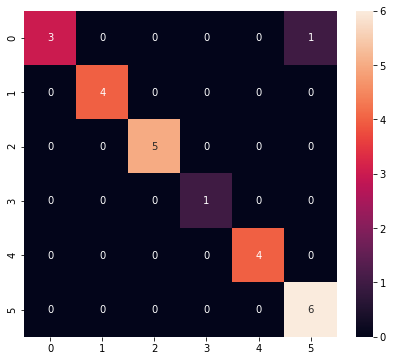

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       0.86      1.00      0.92         6

    accuracy                           0.96        24
   macro avg       0.98      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\adios\AppData\Local\Temp\tmpfyfgazjx\assets


6448

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.8994876e-01 3.9274287e-03 5.3838750e-05 5.0259199e-02 1.1322650e-03
 5.5467850e-01]
5
